# Regret Matching and Minimisation

##Learning Objectives

*   Learn about regret matching.
*   Understand how self-play regret matching can learn Nash Equilibria.
*   Write a regret matching algorithm to solve Rock, Paper, Scissors.

The regret matching algorithm that you learn here is a form of machine learning that can be used to solve games for Nash Equilibrium [1].

We recommend that you have some basic python programming experience.  

## Regret Minimisation

Regret is defined as how much you would have preferred to have played a different strategy than the one that you did play. By minimising regret, we can find Nash Equilibria in zero-sum normal form games. There are a range of regret minimisation algorithms. We will be using regret matching, which is one of the simpler algorithms.

Rock Paper Scissors is used as a simple game with a known solution in order to learn about the algorithm. Regret matching can be used to solve harder games, and it is a key part of Counter Factual Regret Minimisation algorithms, which can solve games with incomplete information such as Texas Hold Em poker [2].

## This Notebook

This is a Jupyter notebook, that lets you run blocks of code interactively. To run some code, simply click on the code block and click on the play icon that will appear in the top left of the code block.

## Coding Approach

During the notebook you will write your own regret matching algorithm. We will guide you through step by step and we have provided the basic structure of the functions you will need. Your job is to fill in the code in the functions. In many of these, we have written tests below the functions as 'assert' statements. You can use these to check that your code works correctly - if the assert statement raises an error then you need to change your code.

# Rock Paper Scissors
Rock Paper Scissors, RPS, or Roshambo, is a well known game. It may seem random but there are competitive tournaments.

Play the code below to see a competitive RPS game for a $50,000 prize.

In [ ]:
from IPython.display import IFrame

IFrame("https://www.youtube.com/embed/6yrdT5y12kA", width=560, height=315)

## Game Theory Definitions

Rock Paper Scissors can be modelled as a 2 player simultaneous zero-sum Normal Form
game. 2 players choose an action at the same time, such that the payoffs always sum to zero i.e. if I win some utility then my opponent loses the same amount of utility.

A Normal Form game is defined as a tuple $(N, S, A, u)$.

*   $N = \{1,2\}$ is the set of players.
*   $S_i = \{Rock, Paper, Scissors\}$ is the set of actions for each player.
*   $A = S_1 \times S_2$ is the set of possible simultaneous actions by both players.
*   $u$ is a function mapping each action profile to a utility for each player.

The game can be represented in a payoff matrix, such that each entry is $(u_1, u_2)$.

\begin{array}{ccc}
&\text{Rock}&\text{Paper}&\text{Scissors}\\
\text{Rock} & (\;0,\;0) & (-1,1) & (1,-1)\\
\text{Paper} & (1,-1) & (\; 0,\;0) & (-1,1)\\
\text{Scissors} &(-1,1) & (1,-1) & (\; 0,\;0)
\end{array}







## Regret Matching

### Utility
Imagine that we are playing Rock Paper Scissors for money. Whoever loses the game gives £1 to the winner. If we play Rock and our opponent plays Scissors then we win £1, if our opponent plays Paper then we lose £1 and if our opponent plays Rock it is a tie and we do not gain or lose any money. We can describe our winnings as a utility, either 1,0 or -1.

### Regret
Let us say that in the first round we play Rock and our opponent plays Paper - unfortunately we lose £1.

*   We do not have any regret of not playing Rock, because we did play Rock. So we can set our regret here to 0.
*   We regret not having played Paper and drawing, in which case we would have not lost or gained any money, so we would have been £1 better off than what actually happened. So we can say that the value of our regret of not playing Paper is £1.
*   We also regret not having played Scissors and winning £1, which would have left us £2 better off than what we did play. So our regret of not playing Scissors is £2.  

So after playing Rock against our opponent's Paper, our **total regrets** for the actions (Rock, Paper, Scissors) can be written as (0,1,2). Formally, regret is the utility of the action we could have played minus the utility of the action that we did play.


## Challenge - Write A Simple Function That Gives The Utility for Player 1 of Each Action, If We Know Player 2's Action

If we know player 2's action, what are the payoffs for Rock, Paper and Scissors for player 1?

We can assign each action a number. So Rock is 0, Paper is 1 and Scissors is 2.

Try and write the function below. The payoff matrix given above might be useful. We've also written a few tests so you can see if your function is correct or not. Read the function docstring (the comments) for more information about how the function should behave.

In [3]:
import numpy as np


def get_action_utilities(opponent_action):
    """
    Get the utilities for player 1 of playing an action,
    if we know what player 2's action is.

    Parameters:
    opponent_action (int): 0, 1 or 2 (Rock, Paper or Scissors)

    Returns:
    list of ints: [u(Rock), u(Paper), u(Scissors)]
    """

    # WRITE YOUR CODE HERE
    # You need to return the utility of playing Rock, Paper or Scissors, given what your opponent played

    utilities = np.array([[0,-1,1],
                          [1,0,-1],
                          [-1,1,0]])
    return utilities[:,opponent_action]


# Tests.
# The lines below test if the function works as it should
# Each line checks if the function returns the correct action utilities, given the input
assert np.array_equal(get_action_utilities(0), [0,1,-1])
assert np.array_equal(get_action_utilities(1), [-1,0,1])
assert np.array_equal(get_action_utilities(2), [1,-1,0])
print("All tests passed")


All tests passed


## Challenge - Write A Function That Gives Player 1's Regrets

We need another helper function that gives us the regret for player 1 of not playing Rock, Paper or Scissors, given what player 1 and player 2 did. You will find it useful to use the get_action_utilities function that you just wrote.

NOTE: You need to run the cell above to save the function in the notebook's memory, before you can use it in another cell.

In [4]:
def get_regrets(my_action, opponent_action):
  """
  Get the regrets for player 1 of not playing an action,
  given what what both player's actions were.

    Parameters:
    my_action (int) : 0, 1 or 2 (Rock, Paper or Scissors)
    opponent_action (int): 0, 1 or 2 (Rock, Paper or Scissors)

    Returns:
    list of ints: [regret(Rock), regret(Paper), regret(Scissors)]
  """

  # WRITE YOUR CODE HERE
  # You need to work out the regrets that you have based on what you and your opponent played
  # For each action:
  #   regret = utility of the action - utility of what you did play
  # Use the function that you just wrote, get_action_utilities(), to help
  regrets = [0,0,0]
  action_utilities = get_action_utilities(opponent_action)

  for action in range(3):
    regrets[action] = action_utilities[action] - action_utilities[my_action]
  return regrets

#Tests
assert np.array_equal(get_regrets(0,0), [0,1,-1])
assert np.array_equal(get_regrets(2,2), [1,-1,0])
assert np.array_equal(get_regrets(0,1), [0,1,2])
assert np.array_equal(get_regrets(1,0), [-1,0,-2])
assert np.array_equal(get_regrets(2,0), [1,2,0])
# These tests don't cover all cases. Feel free to add more, or if you are confident then move on
print("All tests passed")

# In our example, player 1 played Rock against player 2's Paper.
print("Our regret in the example is ", get_regrets(0,1))


All tests passed
Our regret in the example is  [np.int64(0), np.int64(1), np.int64(2)]


### Regret Matching
One idea to improve our strategy would be to play the action that we most regretted last time. In our example above where we played Rock against our opponent's Paper, we most regret not playing Scissors, and so we will choose to play Scissors next time. That would work against a very dumb opponent who always plays Paper. But it will make us very predictable, and so very exploitable by a smart opponent.

We can add some unpredictability by randomly selecting an action **proportional to positive regrets**. In our example above our regrets so far for not playing Rock, Paper, Scissors are 0, 1 and 2. In order to turn that into a strategy we need to write down our probability of playing each action. Probabilities have to sum to 1, so we can **normalise** the regrets by dividing each by the total regrets (0+1+2=3).

This would give us a mixed strategy where the probabilty of playing Rock is $0$, the probability of playing Paper is $\frac{1}{3}$ and the probability of playing Scissors is $\frac{2}{3}$. That mixed strategy can be written conveniently as ($0$, $\frac{1}{3}$, $\frac{2}{3}$). These probabilites are also called **normalised positive regrets**.




## Question: What Is The Weakness With This Strategy?

Playing the action you regretted last time is easily predictable

## Multiple Rounds

####Round 1 Summary:
*   action_p1: Rock
*   action_p2: Paper
*   regrets_sum_p1: [0,1,2]
*   new strategy_p1: [0,1/3,2/3]

In round 2, we choose Paper. Let's assume that our opponent chooses Paper as well. What does this do to our regrets and strategy?

We can work out our regrets using the function we just wrote. $\text{get_regrets}(1,1)$ should return $[-1,0,1]$. We can add that to our regrets from round 1 to get **total cumulative regrets** of $[-1,1,3]$. We have a negative total regret of playing Rock - this means that we are happy that we did not play it, and so we do not want to play it in the future. In the same way as before our new strategy is determined by our **normalised positive regrets** (we ignore the negative regrets). This gives us a new strategy of $[0,1/4,3/4]$.

####Round 2 Summary:
*   action_p1: Paper
*   action_p2: Paper
*   regrets_sum_p1: [-1,1,3]
*   new strategy_p1: [0,1/4,3/4]

## Challenge - Write A Function That Gives A Strategy Based on A Player's Total Regrets

You need to find the **normalised positive regrets** given the total regrets. Here are some tips:

*   Make sure that your function handles negative regrets correctly, and only considers positive regrets when calculating the strategy.
*   The strategy should return normalised probabilities, so they need to sum to 1.
*   If there are no positive regrets at all, then your function should return a uniform strategy.   


In [5]:
def get_strategy(regret_sum):
  """
  Get a strategy given a regret_sum.

  The strategy is equivalent to the normalised positive regrets.

  If there are no positive regrets, the uniform startegy [1/3,1/3,1/3] is returned

    Parameters:
    regret_sum (list of ints) : [cumulative regret(Rock), cumulative regret(Paper), cumulative regret(Scissors)]

    Returns:
    list of floats: [p(Rock), p(Paper), p(Scissors)]
    # Probabilities of playing each action
  """

  # WRITE YOUR CODE HERE
  # You need to convert the regret_sum, a list of numbers, into normalised positive regrets
  # 1. Convert any negative regrets to zero
  # 2. Normalise the array so that it adds to 1
  # That will give you a strategy profile
  # Take care of edge cases such as what happens if all the regrets are negative

  strategy = np.zeros(3)
  for action in range(3):
    if regret_sum[action] > 0:
      strategy[action] = regret_sum[action]
    else:
      strategy[action] = 0

  if np.sum(strategy) > 0:
    strategy /= np.sum(strategy)
  else:
    strategy = np.array([1/3,1/3,1/3])
  return strategy


# Your function should pass all of these tests
assert np.array_equal(get_strategy([1,1,1]), [1/3,1/3,1/3])
assert np.array_equal(get_strategy([0,1,2]), [0,1/3,2/3])
assert np.array_equal(get_strategy([4,10,3]), [4/17,10/17,3/17])
assert np.array_equal(get_strategy([0,1,0]), [0,1,0])
assert np.array_equal(get_strategy([-1,1,3]), [0,1/4,3/4])
assert np.array_equal(get_strategy([5,-2,2]), [5/7,0,2/7])
assert np.array_equal(get_strategy([2,2,-8]), [1/2,1/2,0])
assert np.array_equal(get_strategy([0,0,0]), [1/3,1/3,1/3])
assert np.array_equal(get_strategy([-2,-3,-1]), [1/3,1/3,1/3])
assert np.array_equal(get_strategy([-2,-3,0]), [1/3,1/3,1/3])
print("Tests passed")


Tests passed


## Challenge - Write a 1 Player Regret Matching Algorithm

We now have most of the pieces to buid a fully fledged regret matching algorithm. We will start off doing this for 1 player against a fixed opponent. The 1 player algorithm will learn to exploit any weaknesses the opponent has, given enough time. For example, if the opponent plays Scissors most often, your algorithm will learn to always play Rock to take advantage of that.

The algorithm should follow the same procedure as what we did manually for the first 2 rounds. Each round, you need to add to your cumulative regrets, then update your strategy based on those cumulative regrets.

There's one more thing - we need to keep track of a strategy_sum, which is all the strategies we played at each iteration added together. The strategy sum will smooth out any fluctuations and should converge to a good strategy to play against the opponent, given enough time.

We've given you the basic pseudocode below. It will help to use the functions that you have written so far. We also give you one extra function that will give you a random action given a player's strategy.

In [18]:
def get_action(strategy):
  """
  Returns an action given a strategy, based on the strategy probabilities.
  The strategy passed in must be normalised - it must sum to 1.

    Parameters:
    strategy (list of 3 floats) : [prob(Rock), prob(Paper), prob(Scissors)]

    Returns:
    integer: action (0=Rock, 1=Paper, 2=Scissors)

  """
  return np.random.choice([0,1,2], p=strategy)


def train_p1(iterations, strategy_p2):
  """
  Trains a player to play against a fixed opponent by regret matching.

  Updates player 1's strategy at each iteration, based on the the cumulative regrets

  Returns a normalised sum of all strategies played in all iterations

    Returns:
    list of floats: [p(Rock), p(Paper), p(Scissors)]
    (Probabilities of playing each action)
  """
  # Initialise regrets_sum and and strategy_sum
  regrets_sum_p1 = np.zeros(3)
  strategy_sum = np.zeros(3)

  # WRITE YOUR CODE HERE
  # loop
    # Get players 1's strategy based on the regrets_sum
    # Get player 1's action based on player 1's strategy
    # Get player 2's action based on player 2's strategy (strategy_p2)
    # Get player 1's regrets based on player 1's action and player 2's action
    # Add player 1's regrets to the regrets_sum
    # Add player 1's strategy to the strategy sum

  #return the normalised strategy_sum as the strategy solution
  for i in range(iterations):
    strategy_p1 = get_strategy(regrets_sum_p1)
    action_p1 = get_action(strategy_p1)

    action_p2 = get_action(strategy_p2)

    regrets_sum_p1 += get_regrets(action_p1, action_p2)

    strategy_sum += strategy_p1

  return strategy_sum/np.sum(strategy_sum)





# There are no tests for this function because there is randomness involved,
# so that answers will be different each time

# Your function should learn to exploit your opponent's weaknesses.
# If your opponent plays one of the actions a lot more than the others,
# then your algorithm should learn to play whatever action beats that

# In this example, player 2 is playing Rock most often
# Your algorithm should learn to play Paper a lot to beat player 2
train_p1(iterations=2000, strategy_p2 = [0.4,0.3,0.3])

# The average strategy that is computed by regret matching is the strategy that minimizes regret
# against the opponent’s fixed strategy. In other words, it is a best response to their strategy.


# What happens if you set the opponent strategy to [1/3,1/3,1/3]?

array([0.05227179, 0.9451171 , 0.00261111])

## Q. What happens if you set the opponent's strategy to [1/3, 1/3, 1/3]? Why Does That Happen?

The strategy keeps changing every time it is run. This is because the opponents strategy is randomly generated which is likely to be an uneven distribution of actions.

## The Weaknesses with Simple Regret Matching

As you have seen, regret matching is good at finding weaknesses against a fixed opponent. But there are 2 big problems:

### Weakness 1 - Exploitability
During the course of play, the regret matching algorithm plays lots of strategies away from Nash Equilibrium. If an opponent can detect that, or if an opponent knows that you are playing regret matching, then the opponent can work out what your strategy is and exploit it.

In the example we used at the start, our strategy for round 2 was $[0, 1/3, 2/3]$. If our opponent knows that then they can get a big advantage by playing Scissors next round. We have no chance of playing Rock and winning against Scissors with our strategy, but our opponent will win if we play Paper. Our strategy is exploitable.

### Weakness 2 - Nash Equilibrium Opponent
If the opponent is playing at Nash Equilibrium, in this case $[1/3, 1/3, 1/3]$, then our regret matching algorithm is overly influenced by chance fluctuations.  If you play against an opponent like this, there is no weakness to exploit. But by chance the opponent will probably play one action more than another, which the regret matching algorithm will pick up on and treat the same way as a weakness. This can result in very exploitable strategies.

## Self Play
Regret matching is more useful when used with self-play. It has been shown [1] that in a zero-sum 2 player simultaneous game, players who are both using regret minimisation strategies will converge to a Nash Equilibrium. Nash Equilibrium is a defensive solution concept - it cannot be exploited in a symmetric 2 player game.


## Challenge - Adapt the Train Algorithm to A Self-Play Algorithm

We recommend that you begin by copy and pasting your code from the 1 player algorithm, and then adapting it so that player 2 updates their strategy the same way that player 1 does. You can add both players' strategies to the strategy_sum on each iteration.


In [10]:
def train(iterations):
  """
  Trains 2 players through regret matching to find a Nash equilibrium for
  Rock Paper Scissors.

  Updates both players' startegies at each iteration, based on the the cumulative regrets

  Returns a normalised sum of all strategies played in all iterations, across both players

    Returns:
    list of floats: [p(Rock), p(Paper), p(Scissors)]
    # Probabilities of playing each action
  """

  # Initialise regrets_sum and and strategy_sum
  regrets_sum_p1 = np.zeros(3)
  regrets_sum_p2 = np.zeros(3)
  strategy_sum = np.zeros(3)

  # WRITE YOUR CODE HERE
  # Very similar to the 1 player algorithm
  # But this time treat player 2 the same way as player 1, tracking regrets and updating the strategy

  # Return the sum of both players strategies, normalised

  strategy_sums_history = np.zeros((iterations, 3))

  for i in range(iterations):

    strategy_p1 = get_strategy(regrets_sum_p1)
    action_p1 = get_action(strategy_p1)
    strategy_p2 = get_strategy(regrets_sum_p2)
    action_p2 = get_action(strategy_p2)

    regrets_sum_p1 += get_regrets(action_p1, action_p2)
    regrets_sum_p2 += get_regrets(action_p2, action_p1)

    strategy_sum += strategy_p1
    strategy_sum += strategy_p2
    strategy_sums_history[i, :] = strategy_sum/np.sum(strategy_sum)

  return strategy_sums_history



train(iterations=1000)

array([[0.33333333, 0.33333333, 0.33333333],
       [0.41666667, 0.25      , 0.33333333],
       [0.44444444, 0.27777778, 0.27777778],
       ...,
       [0.33986257, 0.34476916, 0.31536828],
       [0.33995799, 0.34468477, 0.31535725],
       [0.34006995, 0.34460816, 0.31532189]])

## Question - What are the advantages and disadvantages of playing at Nash Equilibrium versus trying to exploit your opponent's weaknesses? What would happen if you were playing against someone where you knew (or could work out) what their strategy was? What would happen if you were playing against someone who knew (or could work out) what your strategy was?

The advantage of playing at nash equilibrium is no one can take advantage of you but at the same time the disadvantage is you cannot take any advantage of your opponents. If you play someone who's strategy was predictable you could adjust your strategy from nash equilibrium to take advantage of that weakness. If you play someone who knew your strategy, then they still wouldn't be able to get an advantage over you due to nash equilibrium.

## Extra Challenge - Can You Visualise the Learning Process Using a Plot?

How could you best visualise what is going on during the regret matching algorithm?

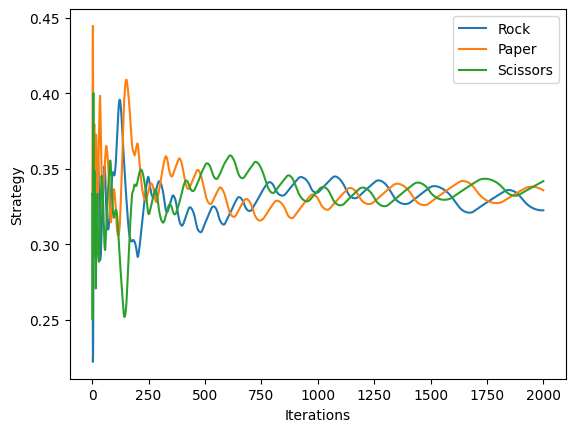

In [16]:
## WRITE YOUR CODE HERE
import matplotlib.pyplot as plt
iterations = 2000
strategies = train(iterations)

plt.plot(range(1, iterations+1), strategies[:,0], label="Rock")
plt.plot(range(1, iterations+1), strategies[:,1], label="Paper")
plt.plot(range(1, iterations+1), strategies[:,2], label="Scissors")
plt.xlabel("Iterations")
plt.ylabel("Strategy")
plt.legend()
plt.show()

[link text](https://)
## Follow Up Project - Can You Generalise Your Code to Any Game?

Can you adapt your code to work for more general games, beyond Rock Paper Scissors? For example with different payoff matrices and more possible actions per player?

Also, think about what the limits of regret matching are - what games will it not work for and why?

## Ackowledgements

The examples and code in this notebook were adapted from [3].


## References

[1] A Simple Adaptive Procedure Leading to
Correlated Equilibrium, Hart and Mas-Colell, 2000
https://wwwf.imperial.ac.uk/~dturaev/Hart0.pdf

[2] Regret Minimization in Games with Incomplete
Information, Zinkevich et al, 2007
https://poker.cs.ualberta.ca/publications/NIPS07-cfr.pdf

[3] An Introduction to Counterfactual Regret Minimization, Neller, 2013
http://modelai.gettysburg.edu/2013/cfr/cfr.pdf

